## We've created different classification metrics. Now let's determine the optimal ones.

Metrics used to evaluate classification models.

Confusion matrix:

Sensitivity:
Recall:

True Positive Rate:
False Positive Rate:

ROC curve
area under the curve, demonstrate what this looks like on a graph


Other issues: oftentimes, we will have to deal with imbalanced classes. That is, classes that are different from one another of course. There are different ways of dealin with this.


Oversampling of the minority class.

Undersampling of the majority class.

Synthetic Minority Over-Sampling Technique:
We take observations from the minority class and we create different.

In [2]:
from sklearn.datasets import load_diabetes,load_breast_cancer



In [ ]:
load_diabetes()

In [3]:
data = load_breast_cancer()

In [6]:
import numpy as np
np.sum(data.target)

357

In [7]:
len(data.target)

569

In [9]:
X_values =data.data

In [14]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
import pandas as pd
df = pd.DataFrame(X_values, columns = data.feature_names)

In [18]:
df['target'] = data.target

In [20]:
new_df = df[df['target'] == 0]

In [21]:
new_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
new_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_values,data.target)

In [27]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()


In [28]:
log_r.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [48]:
from sklearn.metrics import confusion_matrix
y_pred = log_r.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
classes = ['Not Cancer','Cancer']

In [59]:
cm

array([[53,  4],
       [ 2, 84]])

In [ ]:
array([[1000,  0],
       [ 2, 0]])

Confusion Matrix, without normalization
[[53  4]
 [ 2 84]]


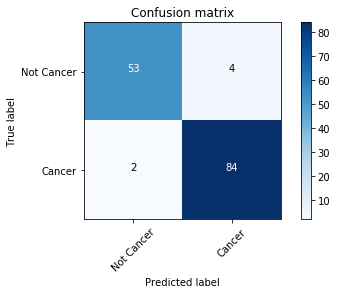

In [49]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [39]:
np.sum(y_test)

86

In [51]:
tn = 53
fn = 2
tp = 84
fp = 4

$Precision = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$

$Recall,Sensitivity,TPR = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$

$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

In [54]:
precision = tp/(tp+fp)
print(precision)

0.9545454545454546


In [56]:
sensitivity = tp/(tp+fn)
print(sensitivity)

0.9767441860465116


In [60]:
##when would we want to have a higher precision, when would we wan
##http://www.navan.name/roc/
## https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html

ROC Curve


In [58]:
import plotly.plotly as py
import plotly.graph_objs as go

In [ ]:
p1 = go.Scatter(x=X.ravel(), y=y, 
                mode='markers',
                marker=dict(color='black'),
                showlegend=False
               )


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(np.dot(X_test * log_r.coef_) + log_r.intercept_).ravel()

p2 = go.Scatter(x=X_test, y=loss, 
                mode='lines',
                line=dict(color='red', width=3),
                name='Logistic Regression Model')

# ols = linear_model.LinearRegression()
# ols.fit(X, y)

# p3 = go.Scatter(x=X_test, y=ols.coef_ * X_test + ols.intercept_, 
#                 mode='lines',
#                 line=dict(color='blue', width=1),
#                 name='Linear Regression Model'
#                 )
p3 = go.Scatter(x=[-4, 10], y=2*[.5],
                mode='lines',
                line=dict(color='gray', width=1),
                showlegend=False
               )

layout = go.Layout(xaxis=dict(title='x', range=[-4, 10],
                              zeroline=False),
                   yaxis=dict(title='y', range=[-0.25, 1.25],
                              zeroline=False))

fig = go.Figure(data=[p1, p2, p3, p4], layout=layout)

In [64]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
SMOTE()